Found stationary point of f:  [1.00270568 0.98804939]


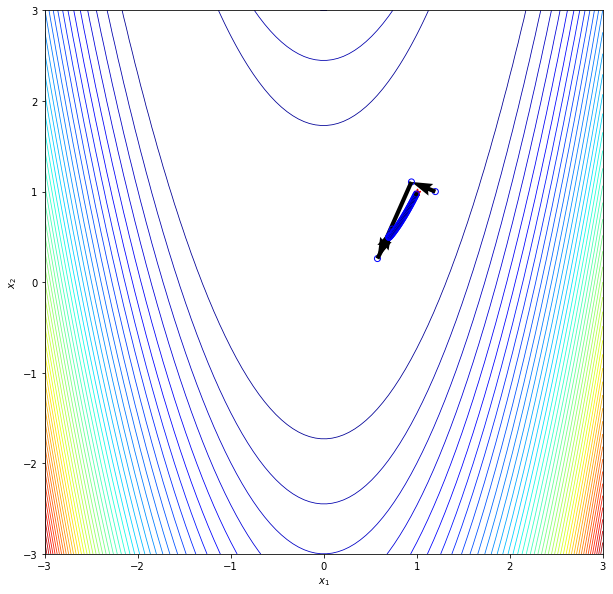

In [5]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


def g(x):
    return np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]), 200*(x[1]-x[0]**2)])

def f(x): 
    return (1-x[0])**2+100*(x[1]-x[0]**2)**2

def f_plot(x, y):
    return (1-x)**2+100*(y-x**2)**2

def d_(x, B):
    r1 = g(x)[0]*B[0][0]+g(x)[1]*B[0][1]
    r2 = g(x)[0]*B[1][0]+g(x)[1]*B[1][1]
    return np.array([-1*r1, -1*r2])

def alpha_new(xk, d):
    alpha=0.5
    rho=0.3
    c1=0.00001
    c2=0.9
    while f(xk+alpha*d)>f(xk)+c1*alpha*g(xk).T.dot(d) or g(xk+alpha*d).T.dot(d) < c2*g(xk).T.dot(d):
        alpha=rho*alpha
    return alpha

def delta(x2, x1):
    return x2 - x1
    
def gamma(x2, x1):
    return g(x2)-g(x1)

def B_new(B, delta, gamma):
    t1=(np.outer(delta,delta.T))/(delta.T.dot(gamma))
    t2=(np.outer((B.dot(gamma)),gamma.T).dot(B))/(gamma.T.dot(B).dot(gamma))
    return B + t1 - t2


x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x_star=[1, 1]
x_0=np.array([1.2,1])  
B_0=np.array([[1,0], [0,1]])

plt.figure(figsize=(10,10))

X, Y = np.meshgrid(x, y)
Z = f_plot(X, Y)
cp = plt.contour(X, Y, Z, 50 , cmap=plt.cm.jet, linewidths=0.8)
plt.scatter(x_star[0], x_star[1], color='red', marker=(5, 2))


def DFP(x_0, epsilon= 0.0001, nIter=50):
    x=x_0
    nIter=nIter
    epsilon=epsilon
    k=0
    B=B_0
    
    for n in range(nIter):
        if LA.norm(g(x))<epsilon:
            print('g(x)<epsilon')
            break
        
        d=d_(x, B)
        alpha=alpha_new(x, d)
        x_=x
        x=x+alpha*d
        delt=delta(x, x_)
        gam=gamma(x, x_)
        
        B=B_new(B, delt, gam)
        
        plt.scatter(x_[0], x_[1], color='b', marker='o',facecolors='none')
        plt.quiver(x_[0], x_[1], alpha*d[0], alpha*d[1], scale_units='xy', angles='xy', scale=1, color='k',linewidths=0.001)
        k+=1
        
    return x

x=DFP(x_0)

print('Found stationary point of f: ', x)
    
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()